In [1]:
import numpy as np
import pandas as pd

h1 = pd.read_csv("../data/H1.csv")
h1["HotelType"] = "Resort"
h2 = pd.read_csv("../data/H2.csv")
h2["HotelType"] = "City"
df = pd.concat([h1, h2], ignore_index=True)
df.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


Count number of cells that violates syntax

In [2]:
nums_invalid_string = 0
def count_redundant_spaces(col):
  return df[col].str.strip().ne(df[col]).sum()

for col in df.select_dtypes(include='object'):
    print(count_redundant_spaces(col), col)
    nums_invalid_string += count_redundant_spaces(col)
nums_invalid_string

0 ArrivalDateMonth
118221 Meal
488 Country
0 MarketSegment
0 DistributionChannel
119390 ReservedRoomType
119390 AssignedRoomType
119390 DepositType
119390 Agent
119390 Company
0 CustomerType
0 ReservationStatus
0 ReservationStatusDate
0 HotelType


715659

In [3]:
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip()

Count number of cells that have missing values

In [4]:
missing_values = df.isnull().sum().sum()
missing_values

492

In [5]:
count = df.query("Agent == 'NULL'").shape[0]
count += df.query("Company == 'NULL'").shape[0]
count

128933

In [6]:
invalid_value_level = nums_invalid_string + count + missing_values

Count number of records that have value-set level problems

In [7]:
nums_of_synonym = df[df['Meal'].isin(['Undefined', 'SC'])].shape[0]
nums_of_synonym

11819

Count number of records that have record level problems

In [8]:
invalid_nums_people = df.query("Adults + Children + Babies == 0").shape[0]
invalid_nums_stays = df.query("StaysInWeekendNights + StaysInWeekNights == 0").shape[0]
inconsistent_isRepeated = df.query("(PreviousBookingsNotCanceled + PreviousCancellations > 0) and IsRepeatedGuest == 0").shape[0]
invalid_record_level = invalid_nums_people + invalid_nums_stays + inconsistent_isRepeated

In [9]:
total_cells = np.product(df.shape)

print("Percentage of invalid cells: {}".format((invalid_value_level/total_cells) * 100))
print("Percentage of invalid value-set levels {}".format((nums_of_synonym/len(df)) * 100))
print("Percentage of invalid record levels {}".format((invalid_record_level/len(df)) * 100))

Percentage of invalid cells: 22.11983834492001
Percentage of invalid value-set levels 9.899489069436301
Percentage of invalid record levels 5.973699639835832


Draw quality chart

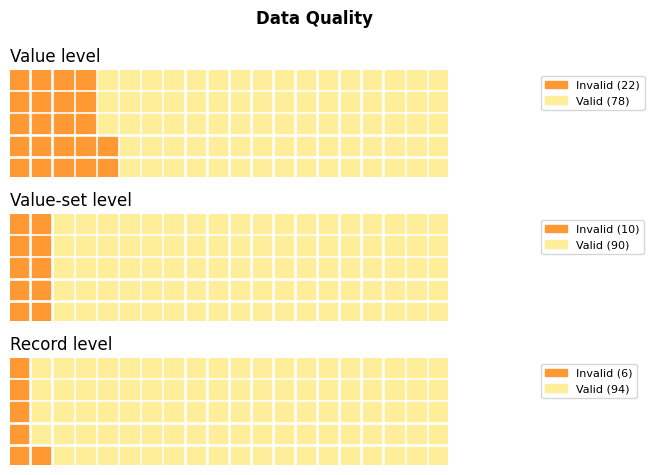

In [10]:
from pywaffle import Waffle
import matplotlib.pyplot as plt

data_frame = pd.DataFrame({
        'labels': ['Invalid', 'Valid'],
        'Value level': [22, 78],
        'Value-set level': [10, 90],
        'Record level': [6, 94]}).set_index('labels')

# Waffle subfigure
fig = plt.figure(
    FigureClass = Waffle,
    plots = {
        311: {
            'values': data_frame['Value level'], 
            'labels': [f"{k} ({v})" for k, v in data_frame['Value level'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
            'title': {'label': 'Value level', 'loc': 'left', 'fontsize': 12}
        },
        312: {
            'values': data_frame['Value-set level'],
            'labels': [f"{k} ({v})" for k, v in data_frame['Value-set level'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
            'title': {'label': 'Value-set level', 'loc': 'left', 'fontsize': 12}
        },
        313: {
            'values': data_frame['Record level'],
            'labels': [f"{k} ({v})" for k, v in data_frame['Record level'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
            'title': {'label': 'Record level', 'loc': 'left', 'fontsize': 12}
        }
    },
    rows = 5,
    colors=["#FF9933", "#FFEE99"],
    cmap_name = "tab20b")

fig.suptitle('Data Quality', fontsize = 12, fontweight = 'bold')

plt.show()

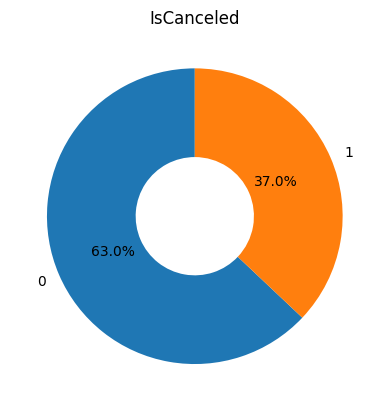

In [11]:
values = df['IsCanceled'].value_counts().sort_values(ascending=False)  # Sort values for better visual clarity

plt.pie(values, labels=values.index, autopct="%1.1f%%", wedgeprops=dict(width=0.6), startangle=90)  # Adjust width for doughnut hole
plt.title("IsCanceled")
plt.show()